In [1]:
import numpy as np 
import pandas as pd

In [2]:
df= pd.read_csv('spam.csv',encoding=('ISO-8859-1'))

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
861,ham,Your brother is a genius,NaN,NaN,NaN
471,ham,"How long has it been since you screamed, princ...",NaN,NaN,NaN
4073,ham,A lot of this sickness thing going round. Take...,NaN,NaN,NaN
825,ham,Hmm .. Bits and pieces lol ... *sighs* ...,NaN,NaN,NaN
3227,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.shape

(5572, 5)

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# Since column name one and two is not good for model training
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [10]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
# we want to change the value of ham and spam 
# for this we use LabelEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()


In [12]:
df['Target']=LE.fit_transform(df['Target']) # it give 0 for ham and 1 for spam

In [13]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
df.isnull().sum() # check missing value or not

Target    0
Text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df=df.drop_duplicates(keep='first') # keep= first means first row ke duplicate delete nhi hoga

In [17]:
df.duplicated().sum()

0

In [18]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

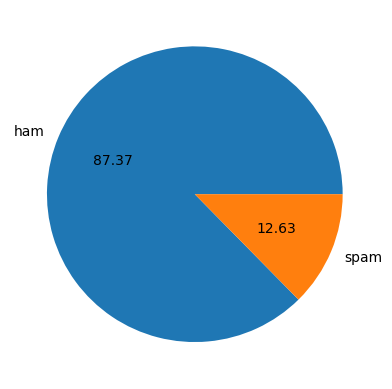

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts() , labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [20]:
# in this case we found that data is imbalanced because ham is more than spam

In [21]:
import nltk
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['No_Character']= df['Text'].apply(len)

C:\Users\hp\AppData\Local\Temp\ipykernel_5276\466498334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_Character']= df['Text'].apply(len)


In [24]:
df

,Target,Text,No_Character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [25]:
df['No_Words']= df['Text'].apply(lambda x:len(nltk.word_tokenize(x))) # no of word

C:\Users\hp\AppData\Local\Temp\ipykernel_5276\1722930401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_Words']= df['Text'].apply(lambda x:len(nltk.word_tokenize(x))) # no of word


In [26]:
df

,Target,Text,No_Character,No_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [27]:
df['No_Sentence']= df['Text'].apply(lambda x:len(nltk.sent_tokenize(x))) # we count total no of sentence

C:\Users\hp\AppData\Local\Temp\ipykernel_5276\2865833717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_Sentence']= df['Text'].apply(lambda x:len(nltk.sent_tokenize(x))) # we count total no of sentence


In [28]:
df

,Target,Text,No_Character,No_Words,No_Sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [29]:
df[['No_Character','No_Words','No_Sentence']].describe()

,No_Character,No_Words,No_Sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
#Maximum word 220 ,maximum character 910 and maximum sentence 28
# if we want to classify based on ham and spam

In [31]:
df[df['Target']==0][['No_Character','No_Words','No_Sentence']].describe() # in case of ham 

,No_Character,No_Words,No_Sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
df[df['Target']==1][['No_Character','No_Words','No_Sentence']].describe() # in case of spam

,No_Character,No_Words,No_Sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
import seaborn as sns

<AxesSubplot:xlabel='No_Character', ylabel='Count'>

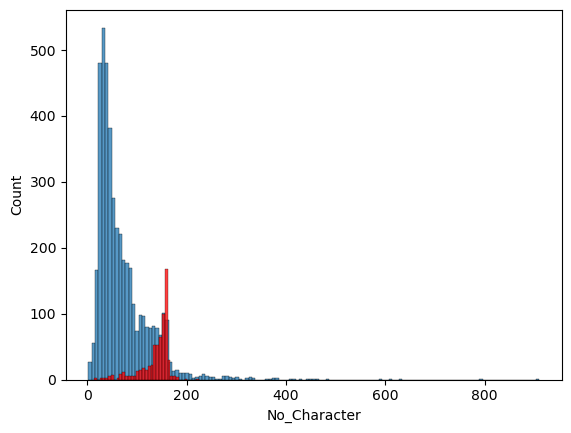

In [34]:
sns.histplot(df[df['Target']==0]['No_Character'])
sns.histplot(df[df['Target']==1]['No_Character'], color='red')

<AxesSubplot:xlabel='No_Words', ylabel='Count'>

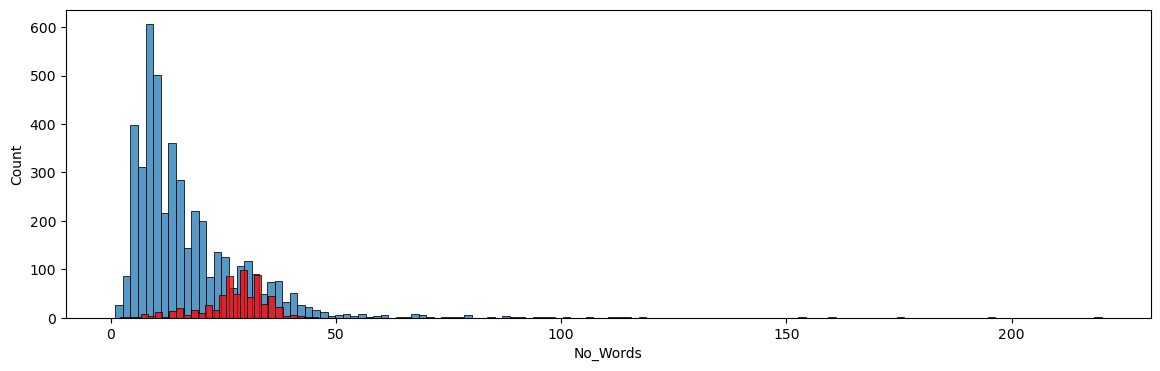

In [35]:
plt.figure(figsize=(14,4))
sns.histplot(df[df['Target']==0]['No_Words'])
sns.histplot(df[df['Target']==1]['No_Words'], color='red')

<AxesSubplot:>

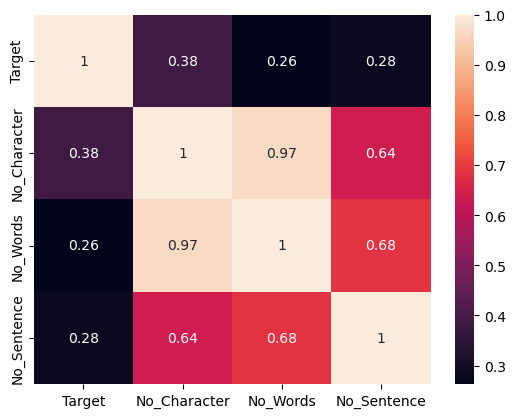

In [36]:
sns.heatmap(df.corr(),annot=True)

In [37]:
#  jaise jaise number of character badta hai vaise vaise sms spam hone chance badhta hai
# no of character and no sentence ,no of words and no of character ke bich multicolliniarity hai
# isliye hume kewal ek hi column ko lena padega jo ki number of character hai

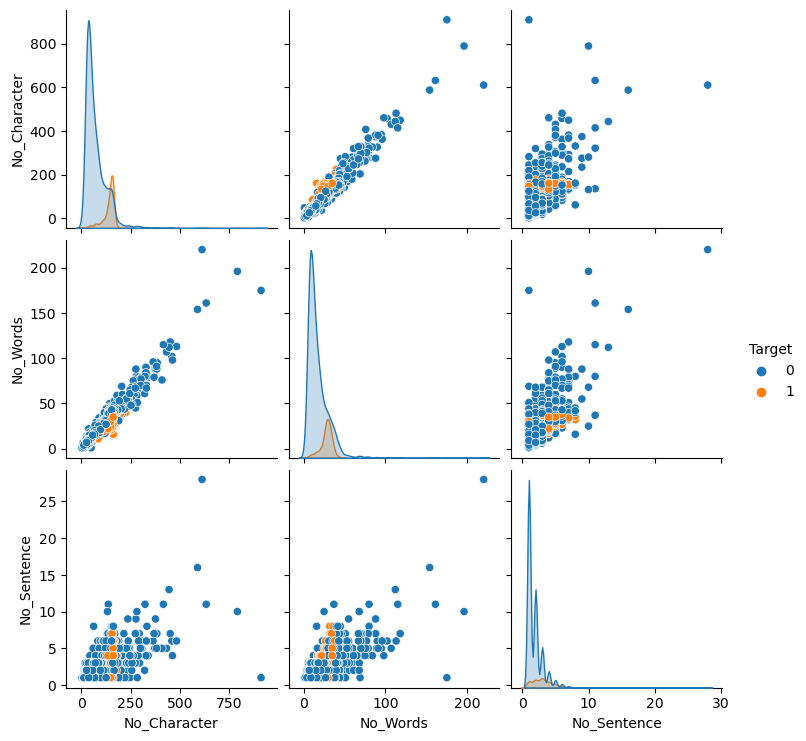

In [38]:
sns.pairplot(df,hue='Target')

In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('Dancing')

'danc'

In [41]:
def data_preprocess(text):
    text= text.lower()
    text=nltk.word_tokenize(text)
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~...'''
    
    y=[]
    for i in text:
        if i.isalnum:
            y.append(i)
    text= y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in punc:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [42]:
data_preprocess("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

"'m gon na home soon n't want talk stuff anymor tonight k 've cri enough today"

In [43]:
df['Transform_Text']=df['Text'].apply(data_preprocess)

C:\Users\hp\AppData\Local\Temp\ipykernel_5276\1954280402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transform_Text']=df['Text'].apply(data_preprocess)


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

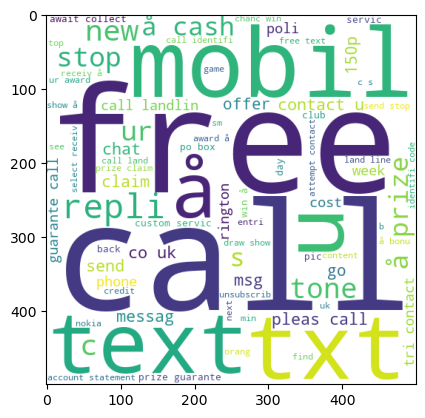

In [45]:
spam_wc=wc.generate(df[df['Target']==1]['Transform_Text'].str.cat(sep=''))
plt.imshow(spam_wc)

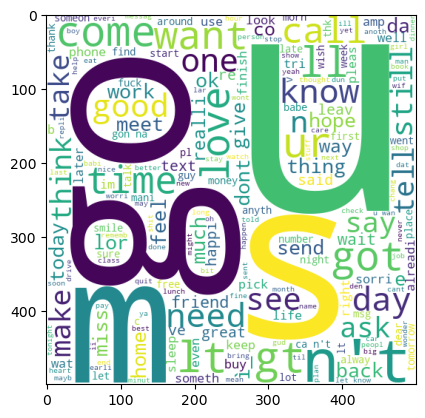

In [46]:
ham_wc=wc.generate(df[df['Target']==0]['Transform_Text'].str.cat(sep=''))
plt.imshow(ham_wc)

In [47]:
# Top 50 word use in spam
spam_corpus=[]
for msg in df[df['Target']==1]['Transform_Text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [48]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005.',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 "'s",
 'appli',
 '08452810075over18',
 "'s",
 'freemsg',
 'hey',
 'darl',
 "'s",
 '3',
 'week',
 "'s",
 'word',
 'back',
 "'d",
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'å£1.50',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'å£900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461.',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 '20,000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575.',
 'cost',
 '150p/day',
 '6day',
 '16+',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'w

In [49]:
ham_corpus=[]
for msg in df[df['Target']==0]['Transform_Text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [50]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 "n't",
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 "'mell",
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 "'m",
 'gon',
 'na',
 'home',
 'soon',
 "n't",
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 "'ve",
 'cri',
 'enough',
 'today',
 "'ve",
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 "'m",
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'n

In [51]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


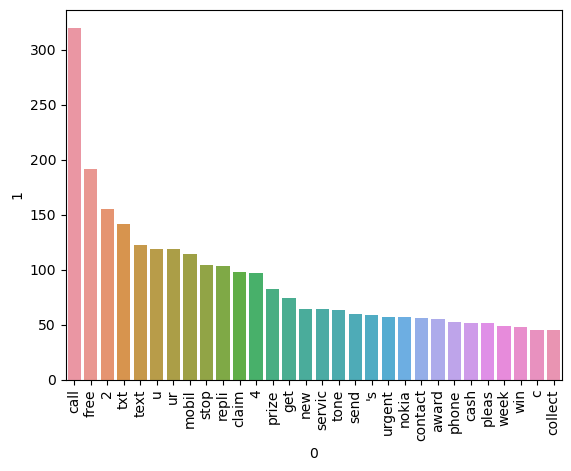

In [52]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],(pd.DataFrame(Counter(spam_corpus).most_common(30))[1]))
plt.xticks(rotation='vertical')
plt.show()

In [53]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,'s,413
2,go,404
3,'m,371
4,get,349
5,n't,338
6,gt,288
7,lt,287
8,2,284
9,come,275


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


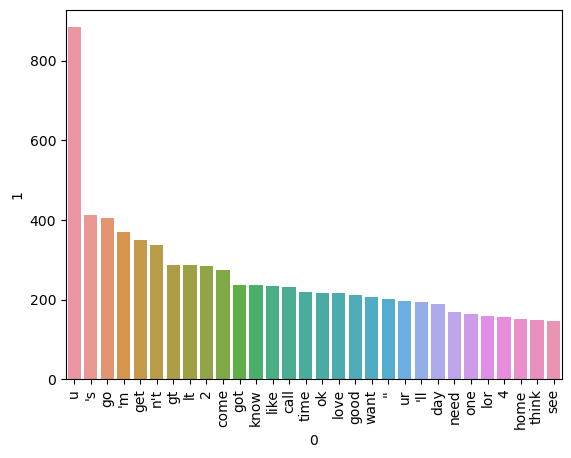

In [54]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],(pd.DataFrame(Counter(ham_corpus).most_common(30))[1]))
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [55]:
# Text Vectorization
# using Bag of Words
df.head()

,Target,Text,No_Character,No_Words,No_Sentence,Transform_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [57]:
X =tfidf.fit_transform(df['Transform_Text']).toarray()

In [58]:
X.shape

(5169, 3000)

In [59]:
y = df['Target'].values

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [63]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [64]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.879110251450677
[[790 106]
 [ 19 119]]
0.5288888888888889


In [65]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [66]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9864603481624759
[[896   0]
 [ 14 124]]
1.0


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [85]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [86]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [87]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [88]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.975)

In [89]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.975


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9864603481624759
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8469387755102041
For  LR
Accuracy -  0.9593810444874274
Precision -  0.9615384615384616
For  RF
Accuracy -  0.9787234042553191
Precision -  1.0
For  AdaBoost
Accuracy -  0.9729206963249516
Precision -  0.9583333333333334
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8467153284671532
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.967479674796748
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.93
For  xgb
Accuracy -  0.9758220502901354
Precision -  0.952


In [90]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [91]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.986460,1.000000
5,RF,0.978723,1.000000
0,SVC,0.976789,0.975000
8,ETC,0.977756,0.967480
4,LR,0.959381,0.961538
6,AdaBoost,0.972921,0.958333
10,xgb,0.975822,0.952000
9,GBDT,0.949710,0.930000
3,DT,0.932302,0.846939


In [92]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [93]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.986460
2,RF,Accuracy,0.978723
3,SVC,Accuracy,0.976789
4,ETC,Accuracy,0.977756
5,LR,Accuracy,0.959381
6,AdaBoost,Accuracy,0.972921
7,xgb,Accuracy,0.975822
8,GBDT,Accuracy,0.949710
9,DT,Accuracy,0.932302


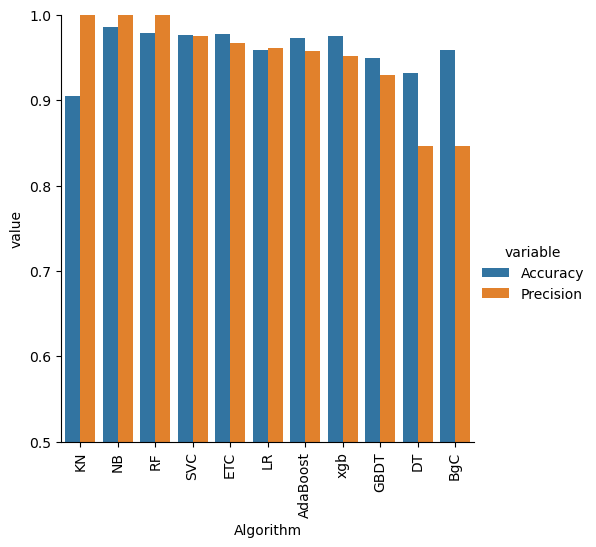

In [94]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [95]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [96]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [97]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [98]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [99]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [100]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.986460,1.000000,0.986460,1.000000,0.986460,1.000000,0.986460,1.000000
2,RF,0.978723,1.000000,0.978723,1.000000,0.978723,1.000000,0.978723,1.000000
3,SVC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
4,ETC,0.977756,0.967480,0.977756,0.967480,0.977756,0.967480,0.977756,0.967480
5,LR,0.959381,0.961538,0.959381,0.961538,0.959381,0.961538,0.959381,0.961538
6,AdaBoost,0.972921,0.958333,0.972921,0.958333,0.972921,0.958333,0.972921,0.958333
7,xgb,0.975822,0.952000,0.975822,0.952000,0.975822,0.952000,0.975822,0.952000
8,GBDT,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000
9,DT,0.932302,0.846939,0.932302,0.846939,0.932302,0.846939,0.932302,0.846939


In [102]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
bnb = BernoulliNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
bnb.fit(X_train,y_train)

BernoulliNB()

In [103]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', bnb), ('et', etc)],voting='soft')

In [104]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', BernoulliNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [105]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 0.992


In [110]:
# Applying stacking
estimators=[('svm', svc), ('nb', bnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [111]:
from sklearn.ensemble import StackingClassifier

In [112]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [113]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9893617021276596
Precision 0.9847328244274809


In [114]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))